In [1]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv("test.csv")
df.head()

,Name,Age,Income
0,A,19,10100
1,B,20,11000
2,C,25,15000
3,D,24,14500
4,E,26,16200


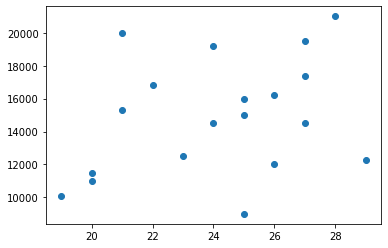

In [3]:
plt.scatter(df["Age"], df["Income"])

In [4]:
k_m = KMeans(n_clusters=3)
k_m

KMeans(n_clusters=3)

In [5]:
y_pred = k_m.fit_predict(df[['Age', 'Income']])
y_pred

array([0, 0, 2, 2, 2, 0, 0, 2, 1, 2, 1, 0, 2, 0, 1, 2, 2, 0, 1],
      dtype=int32)

In [6]:
df["cluster"] = y_pred
df.head()

,Name,Age,Income,cluster
0,A,19,10100,0
1,B,20,11000,0
2,C,25,15000,2
3,D,24,14500,2
4,E,26,16200,2


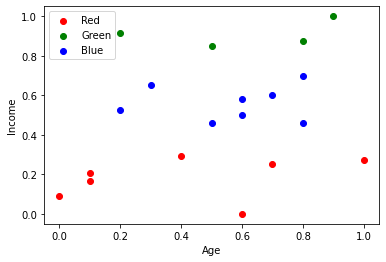

In [19]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]

red_p = plt.scatter(df1.Age,df1['Income'], color = "red")
green_p = plt.scatter(df2.Age,df2['Income'], color = "green")
blue_p = plt.scatter(df3.Age,df3['Income'], color = "blue")

plt.xlabel('Age')
plt.ylabel('Income')
plt.legend((red_p,green_p,blue_p),('Red','Green','Blue'))

In [8]:
scaler = MinMaxScaler()
scaler.fit(df[['Income']])
df["Income"] = scaler.transform(df[['Income']])

scaler.fit(df[['Age']])
df['Age'] = scaler.transform(df[['Age']])
df

,Name,Age,Income,cluster
0,A,0.0,0.091667,0
1,B,0.1,0.166667,0
2,C,0.6,0.500000,2
3,D,0.5,0.458333,2
4,E,0.7,0.600000,2
5,F,0.4,0.291667,0
6,G,0.1,0.208333,0
7,H,0.8,0.458333,2
8,I,0.8,0.875000,1
9,J,0.6,0.583333,2


In [9]:
k_m = KMeans(n_clusters=3)
y_pred = k_m.fit_predict(df[['Age', 'Income']])
y_pred

array([1, 1, 2, 2, 0, 2, 1, 2, 0, 0, 0, 2, 0, 2, 0, 1, 0, 2, 0],
      dtype=int32)

In [10]:
k_m.cluster_centers_

array([[0.6       , 0.771875  ],
       [0.1       , 0.24791667],
       [0.65714286, 0.31916667]])

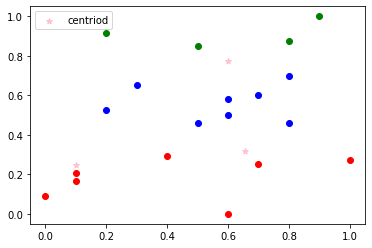

In [11]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]

plt.scatter(df1.Age,df1['Income'], color = "red")
plt.scatter(df2.Age,df2['Income'], color = "green")
plt.scatter(df3.Age,df3['Income'], color = "blue")
plt.scatter(k_m.cluster_centers_[:,0],k_m.cluster_centers_[:,1],color='pink', marker='*',label='centriod')

plt.legend()

In [12]:
k_range = range(1,10)
sse = []

for k in k_range:
    k_m = KMeans(n_clusters=k)
    k_m.fit(df[['Age', 'Income']])
    sse.append(k_m.inertia_)

In [13]:
sse

[3.12405182748538,
 1.732535541310541,
 1.1586602430555555,
 0.7618428240740741,
 0.52397962962963,
 0.39558611111111136,
 0.2943905092592593,
 0.2171855324074075,
 0.17704317129629626]

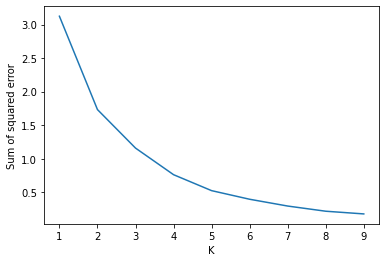

In [14]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_range,sse)